<a href="https://colab.research.google.com/github/PrahasHegde/word_frequency_analysis/blob/main/word_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Installation

In [7]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Scrape the Novel Text

In [3]:
url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
response = requests.get(url)
text = response.text


## Clean and Prepare the Text

In [8]:
clean_text = re.sub(r'[^A-Za-z\s]', '', text).lower() #Remove whitespace, numbers, and punctuation.
words = word_tokenize(clean_text) #Tokenize the cleaned text into words and sentences using nltk.
sentences = sent_tokenize(text)


## EDA (Exploratory Data Analysis)

In [11]:
word_counts = Counter(words)
df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
df = df.reset_index()
df = df.rename(columns={'index': 'word'})

print(f"Total words: {len(words)}")
print(f"Unique words: {df['word'].nunique()}")
print(f"Total sentences: {len(sentences)}")

Total words: 212488
Unique words: 19764
Total sentences: 9064


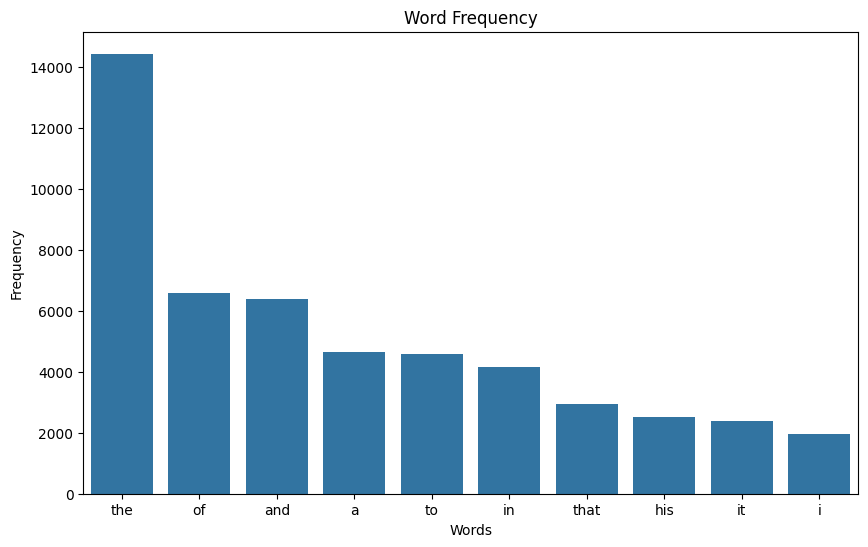

In [18]:
top_words = df.nlargest(10, 'count')
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=top_words)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=0)
plt.show()

## Remove stop words and Visualization


Top 20 Frequent Words (After Stopword Removal):
word
orphan           1
start            1
intercept        1
incommoding      1
tauntingly       1
skyhawk          1
backwardly       1
touchedat        1
destroying       1
coincidings      1
ironical         1
intermixingly    1
whelmings        1
vortex           1
inanimate        1
animate          1
lancepole        1
infatuation      1
prophet          1
mark             1
Name: count, dtype: int64


/tmp/ipython-input-1385994750.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_filtered_words.index, y=top_filtered_words.values, palette="crest")


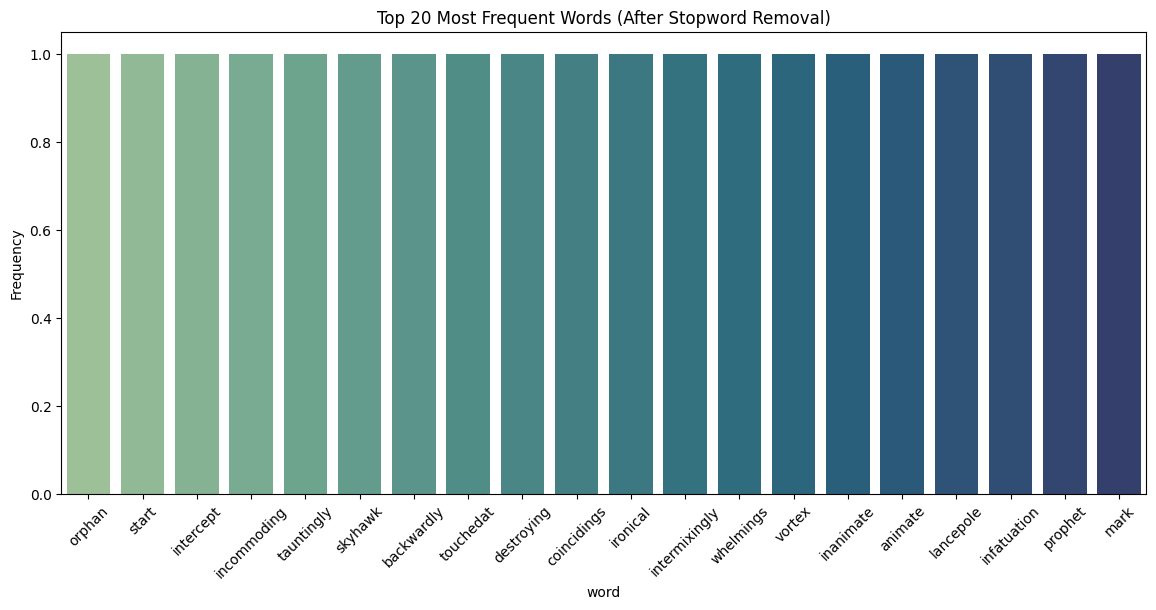

In [19]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in df["word"] if word not in stop_words]

# Create new DataFrame
filtered_df = pd.DataFrame(filtered_words, columns=["word"])
top_filtered_words = filtered_df["word"].value_counts().head(20)

print("\nTop 20 Frequent Words (After Stopword Removal):")
print(top_filtered_words)

# Plot frequency after stopword removal
plt.figure(figsize=(14, 6))
sns.barplot(x=top_filtered_words.index, y=top_filtered_words.values, palette="crest")
plt.title("Top 20 Most Frequent Words (After Stopword Removal)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

## word cloud visualization

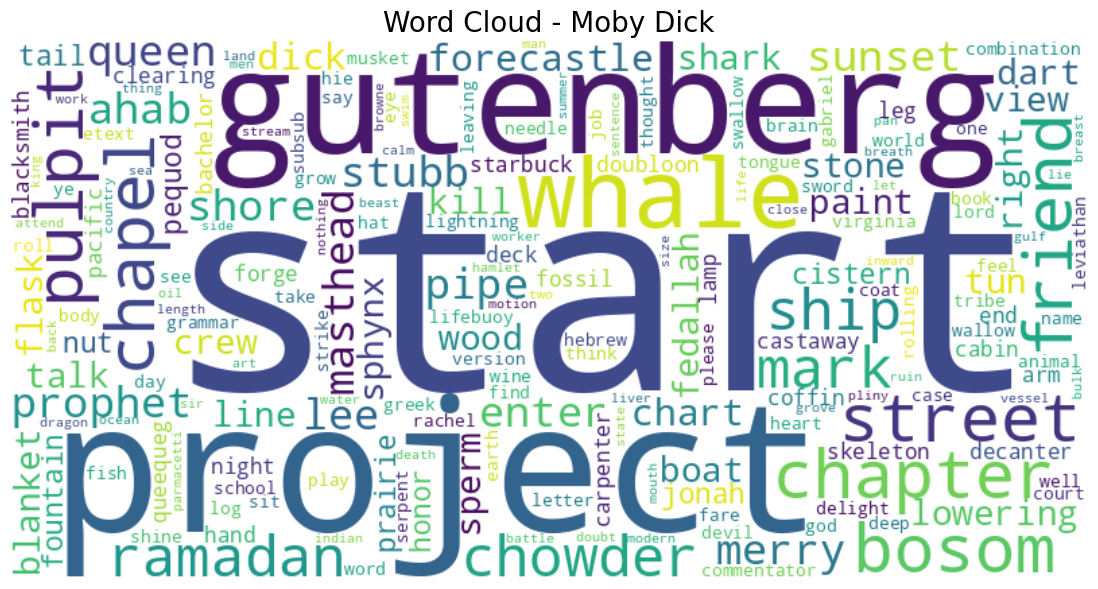

In [20]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Moby Dick", fontsize=20)
plt.show()


## TF-IDF Analysis

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform([clean_text])
df_tfidf = pd.DataFrame(X.T.toarray(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
print(df_tfidf.sort_values(by="TF-IDF", ascending=False).head(10))


          TF-IDF
whale   0.377681
like    0.225745
old     0.172744
man     0.170781
ye      0.165285
ahab    0.165285
whales  0.155862
ship    0.150758
sea     0.148795
time    0.126810


## Sentiment Analysis

In [25]:
from textblob import TextBlob

blob = TextBlob(text)
print("Overall Polarity:", blob.sentiment.polarity)
print("Overall Subjectivity:", blob.sentiment.subjectivity)


Overall Polarity: 0.08239893302363434
Overall Subjectivity: 0.47813507273102795


""" this code calculates and prints the overall sentiment polarity and subjectivity score for the entire novel "Moby Dick" using the TextBlob library. A polarity of 0.082 suggests a slightly positive sentiment overall, and a subjectivity of 0.478 indicates that the text is moderately subjective."""